### Wrangling Data Summative Assignment - Candidate 1061912 - Jupyter Notebook

In [1]:
import pandas as pd
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [2]:
from pathlib import Path

data_dir = Path().cwd().parent / "Python" / "data" / "summative" / "coffee_stack"

##### Initial Analysis of the Posts

In [3]:
import xmltodict
from pathlib import Path
import bs4 

def robustParse(text):
    try: 
        return bs4.BeautifulSoup(text, "lxml").text.replace(" "," ")
    except: 
        return None 

def returnLinks(text):
    try: 
        soup = bs4.BeautifulSoup(text, 'html.parser')
        return [x['href'] for x in soup.find_all('a') if 'href' in x.attrs and "://" in x.get('href')]
    except: 
        return None 

def splitTags(text):
    if type(text) == float:
        return []
    elif len(text) == 0:
        return []
    else:
        return text[1:-1].split("><")
    

def parse_stack_posts(file_path): 
    """Takes an XML export from Stack Exchange and returns it as a cleaned DataFrame. """
    
    # Shaping the data
    xml_data = open(file_path / "Posts.xml" ,'r', encoding = "utf8").read()

    stack_dict = xmltodict.parse(xml_data)
    
    stack_df = pd.json_normalize(stack_dict["posts"]["row"])
    
    # Cleaning index and variable names
    stack_df.columns = [i.replace("@","") for i in stack_df.columns]
    
    stack_df.set_index('Id', inplace=True, drop = False)
    
    # Replacing structural np.nan values in strings
    stack_df["OwnerDisplayName"].fillna("",inplace=True)
    
    # Converting variables to_type 
    for col in ["Score", 
            "ViewCount", 
            "AnswerCount", 
            "CommentCount",
            "FavoriteCount"]:
        stack_df[col] = pd.to_numeric(stack_df[col],errors="coerce")

    for col in ["CreationDate", 
            "LastEditDate", 
            "LastActivityDate", 
            "ClosedDate", 
            "CommunityOwnedDate"]:
        stack_df[col] = pd.to_datetime(stack_df[col])


    # Cleaning up the HTML body text    
    stack_df["clean_Body"] = stack_df["Body"].map(robustParse)

    stack_df["list_url"] = stack_df["Body"].map(returnLinks)    

    # Reshaping text lists  
    stack_df["list_Tags"] = stack_df["Tags"].map(splitTags)


    return stack_df

In [4]:
file_path = data_dir

posts_df = parse_stack_posts(file_path)

In [5]:
# posts_df.head()
# posts_df.tail()
# posts_df.sample()

In [6]:
num_posts = len(posts_df)
print(f"In this data set are {num_posts} posts (of all kinds) in total.") 

In this data set are 4124 posts (of all kinds) in total.


In [7]:
# Questions

new_mask = posts_df["PostTypeId"] == "1"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

1336


In [8]:
# Answers

new_mask = posts_df["PostTypeId"] == "2"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

2649


In [9]:
# Orphaned Wiki Tags

new_mask = posts_df["PostTypeId"] == "3"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

0


In [10]:
# Tag Wiki Excerpt

new_mask = posts_df["PostTypeId"] == "4"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

67


In [11]:
# Tag Wikis

new_mask = posts_df["PostTypeId"] == "5"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

67


In [12]:
# Moderator Nominations

new_mask = posts_df["PostTypeId"] == "6"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

5


In [13]:
# Wiki Placeholder

new_mask = posts_df["PostTypeId"] == "7"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

0


In [14]:
# Privilege Wiki

new_mask = posts_df["PostTypeId"] == "8"

temporary_df_for_post_types = posts_df[new_mask].copy()

num_posts_x = len(temporary_df_for_post_types)

print(num_posts_x)

0


##### Further Analysis of the Posts

In [15]:
new_mask = posts_df["PostTypeId"] == "1"

temporary_df_for_post_types = posts_df[new_mask].copy()

temporary_df_for_post_types["body_Length"] = temporary_df_for_post_types["clean_Body"].apply(len)

temporary_df_for_post_types["body_Length"].mean()

479.20958083832335

In [16]:
new_mask = posts_df["PostTypeId"] == "2"

temporary_df_for_post_types = posts_df[new_mask].copy()

temporary_df_for_post_types["body_Length"] = temporary_df_for_post_types["clean_Body"].apply(len)

temporary_df_for_post_types["body_Length"].mean()

891.388825972065

In [17]:
## We can also find out how many questions received answers.

In [18]:
new_mask = posts_df["PostTypeId"] == "2"

temporary_df_for_post_types = posts_df[new_mask].copy()

len(temporary_df_for_post_types["ParentId"].value_counts())

1256

##### Initial Analysis of the Users

In [19]:
def parse_stack_users(file_path): 
    """Takes an XML export from Stack Exchange and returns it as a cleaned DataFrame. """
    
    
    xml_data = open(file_path / "Users.xml" ,'r', encoding = "utf8").read()

    stack_dict = xmltodict.parse(xml_data)

    stack_df = pd.json_normalize(stack_dict["users"]["row"])
    
    stack_df.columns = [i.replace("@","") for i in stack_df.columns]
    
    stack_df["AboutMe"].fillna("",inplace=True)
    
    stack_df.set_index('Id', inplace=True, drop = False)
    
    for col in ["Reputation","Views","UpVotes","DownVotes"]:
        stack_df[col] = pd.to_numeric(stack_df[col],errors="coerce")
    
    for col in ["CreationDate", 
            "LastAccessDate"]:
        stack_df[col] = pd.to_datetime(stack_df[col])

    stack_df["clean_AboutMe"] = stack_df["AboutMe"].map(robustParse)
        
    return stack_df


In [20]:
data_dir = Path().cwd().parent / "Python" / "data" / "summative" / "coffee_stack"

file_path = data_dir

users_df = parse_stack_users(file_path)

C:\Users\Shay Gillams\anaconda33\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Shay Gillams\anaconda33\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "......" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [21]:
# users_df.head()
# users_df.tail()
# users_df.sample()

In [22]:
len(users_df)

9418

##### Now that we have the users dataframe, let's merge in the Display Name to the posts dataframe, and thereby be able to find out who the top users are. 

In [23]:
if 'DisplayName' not in posts_df.columns:
    posts_df = posts_df.merge(users_df[["DisplayName"]],
                             left_on = "OwnerUserId",
                             right_index = True)
    
posts_df[["clean_Body", "DisplayName"]].head()

,clean_Body,DisplayName
Id,,
1,"I just got a pound of microroasted, local coff...",Kyle Macey
7,Tamping is one of three key controls you have ...,Kyle Macey
18,"In general, it's best to not store ground coff...",Kyle Macey
30,The key here is extraction from the espresso c...,Kyle Macey
34,"In general, darker, arabica roasts have less c...",Kyle Macey


In [24]:
# posts_df.head()
# posts_df.tail()
# posts_df.sample()

In [25]:
# We now have the display names of the users in our posts dataframe. Now let's discover some stuff about those users. 

##### Who Has the Top Answers?

In [26]:
answers_mask = posts_df["PostTypeId"] == "2"

answers_df = posts_df[answers_mask].copy()

answers_df.sort_values("Score", ascending = False, inplace = True)

answers_df.head(7)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,LastEditDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate,clean_Body,list_url,list_Tags,DisplayName
Id,,,,,,,,,,,,,,,,,,,,,
41,41,2,NaN,2015-01-27 22:08:50.447,47,NaN,<p>It took me an embarrassingly long time to r...,39,2015-07-17 14:24:30.953,NaN,...,2015-07-17 14:24:30.953,39,NaT,,NaN,NaT,It took me an embarrassingly long time to real...,[],[],Jev Björsell
24,24,2,NaN,2015-01-27 21:17:34.843,45,NaN,"<p><strong>In a cool, dark, dry, place and whe...",24,2015-12-24 18:51:22.207,NaN,...,2015-12-24 18:51:22.207,1,NaT,,NaN,NaT,"In a cool, dark, dry, place and whenever possi...",[],[],Joshua Aslan Smith
324,324,2,NaN,2015-02-03 23:08:21.193,42,NaN,<p>I read everyone's answer and did some of my...,86,2016-09-06 21:55:03.650,NaN,...,2016-09-06 21:55:03.650,79,NaT,,NaN,NaT,I read everyone's answer and did some of my ow...,[http://www.academia.edu/6246212/Analytical_Me...,[],Nathan
1574,1574,2,NaN,2015-02-25 15:24:04.420,41,NaN,"<p>Akin to the simultaneous fates of <a href=""...",262,2015-03-02 11:41:20.087,NaN,...,2020-06-18 08:36:22.093,1572,NaT,,NaN,NaT,Akin to the simultaneous fates of Schrödinger'...,[http://en.wikipedia.org/wiki/Schroedinger%27s...,[],hoc_age
141,141,2,NaN,2015-01-28 13:58:33.807,40,NaN,"<p>Yes, it's perfectly safe to drink and <em>e...",101,2015-01-28 14:11:57.570,NaN,...,2015-01-28 14:11:57.570,139,NaT,,NaN,NaT,"Yes, it's perfectly safe to drink and extremel...",[http://en.wikipedia.org/wiki/Asian_palm_civet],[],Tim Post
194,194,2,NaN,2015-01-28 21:33:59.920,36,NaN,<h1>Cold Brew Coffee - A Brief look at Flavor ...,100,2016-10-10 11:21:54.137,NaN,...,2016-10-10 11:21:54.137,96,NaT,,NaN,NaT,Cold Brew Coffee - A Brief look at Flavor Prof...,[https://scienceandfooducla.wordpress.com/2014...,[],JayCo
135,135,2,NaN,2015-01-28 12:44:06.413,35,NaN,"<p>In order to maintain consistency, Starbucks...",101,2015-01-28 12:44:06.413,NaN,...,NaT,124,NaT,,NaN,NaT,"In order to maintain consistency, Starbucks ro...",[],[],Tim Post


In [27]:
top_five_highest_scoring = list(answers_df["DisplayName"][0:5])

print(top_five_highest_scoring)

['Jev Björsell', 'Joshua Aslan Smith', 'Nathan', 'hoc_age', 'Tim Post']


In [28]:
print(f"The users with the higest scoring answers are {top_five_highest_scoring}!")

The users with the higest scoring answers are ['Jev Björsell', 'Joshua Aslan Smith', 'Nathan', 'hoc_age', 'Tim Post']!


Jev Björsell has the highest scoring post in the entire stack exchange; its content is as follows. 

In [29]:
answers_df["clean_Body"][0]

'It took me an embarrassingly long time to realize the purpose of this hexagon shaped funnel, so I am sharing this via a self posted answer.\nThe hexagon funnel has three purposes:\n\nIt is a funnel to make it easier to pour your ground coffee into the aeropress opening. \nIt is a funnel for cups with a small opening at the top. The image shows a shot-glass as an example. Trying to use an aeropress with a cup that is too small sucks. \nIt is a stand, so when your aeropress is stowed, it all neatly stacks together. \n\n'

In [30]:
len(answers_df["clean_Body"][0])

516

In [31]:
# It's interesting that the highest rated post is providing (rather than asking for) information, and that it is doing so in
# regard to something which is quite a new innovation, but massively popular among coffee enthusiasts - the areopress. 

Joshua Aslan Smith comes second; his post was about the following:

In [32]:
answers_df["clean_Body"][1]

'In a cool, dark, dry, place and whenever possible vacuum sealed.\nThe oils in roasted coffee degrade as they are exposed to air (oxidization) as well as heat. As with just about any foodstuff moisture accelerates the spoiling process as well. You should store your coffee in completely sealed, insulated, opaque containers. If you have the ability, vacuum pump the air out of the container for ultimate shelf-stability. Even without vacuum storage you can preserve beans for a long time by placing them inside a ziplock bag or coffee bag with a 1-way air seal and pushing as much air out as possible and then following the above method of airtight, dark and cool storage. Following these guidelines should help to ensure the freshness and flavor of the beans for as long as possible. \n'

In [33]:
len(answers_df["clean_Body"][1])

784

In [34]:
# Interestingly, this one is an answer (a thorough one) about coffee storage. Vacuum pumping is quite an advanced entity, so
# it's evident that the forum is not for casual observers, perhaps. (Vacuum storing coffee also costs quite a bit)

Nathan comes third; his post was about the following:

In [35]:
answers_df["clean_Body"][2]

'I read everyone\'s answer and did some of my own research to find an estimation method that satisfies me and might be helpful to others too. I think it should be roughly ±20% accurate.\nFor any amount of "good strength" American-style coffee by any brew method, weigh the dry coffee in grams and multiply by 0.008, or 80mg of caffeine for each 10g of dry coffee.\nWeakly extracted coffee might yield 0.6% of its weight in caffeine and very strongly extracted coffee might get close to 1% caffeine. \nThese numbers are for typical 100% Arabica or mostly Arabica blends. 100% Robusta beans (uncommon) could be about double the caffeine.\nExplanation below:\nMaximum caffeine content\nTypical premium roasted Arabica coffee beans like mine contain close to 1% caffeine by mass when measured by spectrophotometer (p 311)\nthough Robusta (less common and usually blended with Arabica in cheaper coffees) has\nroughly twice that\nmuch. \nIf you have a health concern like wanting to stay under the 300 mg 

In [36]:
len(answers_df["clean_Body"][2])

4200

In [37]:
# Nathan's post is an intensively scientific post about the amount of caffeine in coffee. It's a really, really long one.
# However, it is also very well structured, and evidently well-written. I'd be curious to see whether he edited the post to
# make it so useful. For instance, he writes 'explanation below', and writes "a good rule of thumb". It's interesting that he
# did not write a TL;DR explanation at the bottom, but perhaps that speaks to the character of the exchange, and the fact that
# maybe even long posts will get responses? Would be good to check this idea out further. 

# This is an answer, not a comment, but it's one which is seemingly ending a debate. "I read everyone's answer".

hoc_age, the user with the highest total score, comes next in line, in fourth place, with the following:

In [38]:
answers_df["clean_Body"][3]

'Akin to the simultaneous fates of Schrödinger\'s Cat, answers to your question include no, maybe, and it doesn\'t matter. I have furthermore been unable to avoid philosophical diversion and hypothetical questions in this answer; please forgive me. :)\nAs @EricPlaton noted in comments, the answer depends on a slightly different question: What characteristics define real espresso? Here I merely compare the beverages produced by the following:\n\na traditional espresso machine (See this history of espresso machines and production techniques for one view of what is traditionally espresso), and\ncapsule-based "espresso" systems. There are several capsule-based espresso machines (here\'s a review of Nespresso and three others). You place a small coffee-filled capsule (a.k.a. "pod", made of aluminium, plastic, paper-wrapped, compressed puck, or other material) into the machine and press a button; seconds later it produces a coffee beverage.\n\nMy answers:\nNo.\nIn simple point of fact, espre

In [39]:
len(answers_df["clean_Body"][3])

3353

In [40]:
# This is a much more meandering one, but also a more social one, it would seem. I'd be interested in knowing when this post
# was made - has the character of the group changed radically? It's also interesting to see that this answer references other 
# people's comments (@EricPlayton's in particular)...

And finally, we have the fifth place candidate - Tim Post, who said the following:

In [41]:
answers_df["clean_Body"][4]

"Yes, it's perfectly safe to drink and extremely delicious. In The Philippines, we often call this 'Kopi Alamid', and it truly is one of the rarest coffees on the planet. At around $20 per 75 grams (local price), it's also one of the world's most expensive coffees. \nThe palm civet is a nocturnal cat (well, more like a ferret, but technically a cat) that eats the berries (beans) and is extremely picky in its diet. For the civet to choose a bean, it has to be just right when it comes to the aroma, and given the sensitivity of this creature's nose, said aroma means the bean is perfect. Some say the digestive process itself lends to better flavor, it can be a matter of heated debate depending on where you ask ;)\nThe thing is, the cat doesn't digest the whole bean, just the outer pulp. Farmers follow them around and wait for nature to take its course, then the beans are processed in a very safe manner. Farmers typically get just a kilo or so a day, it's quite an intensive process.\nI drin

In [42]:
len(answers_df["clean_Body"][4])

1922

In [43]:
# This answer is evidently leveraging local knowledge from the Phillipines, and contributing something novel in that way.
# Interesting. 

The top 5 are all from 2015 or 2016 - something which it would be interesting to think about. Datetime analysis on number of
posts would be good, but also average score per year would be excellent (use a groupby). 

##### Who has the highest sum total score across all answers?

In [44]:
users_df["total_score"] = (answers_df.groupby("OwnerUserId").agg("sum")["Score"])

users_df.sort_values("total_score", ascending = False, inplace = True)

users_df.iloc[0:6][["DisplayName", "total_score"]]

,DisplayName,total_score
Id,,
262,hoc_age,586.0
1848,MTSan,566.0
76,Suspended User,534.0
1118,Stephie,311.0
127,fredley,267.0
101,Tim Post,233.0


In [45]:
top_five_highest_scoring_users_agg =  list(users_df["DisplayName"][0:5])

In [46]:
print(top_five_highest_scoring_users_agg)

['hoc_age', 'MTSan', 'Suspended User', 'Stephie', 'fredley']


In [47]:
print(f"The users with the highest total scores were {top_five_highest_scoring_users_agg}!")

The users with the highest total scores were ['hoc_age', 'MTSan', 'Suspended User', 'Stephie', 'fredley']!


##### Who is the user whose questions attracted the most replies?

In [48]:
posts_df["reply_count"] = (answers_df.groupby("ParentId").agg("count")["Id"])

users_df["total_replies"] = (posts_df.groupby("OwnerUserId").agg("sum")["reply_count"])

users_df.sort_values("total_replies", ascending = False, inplace = True)

users_df.iloc[0:7][["DisplayName", "total_replies"]]

,DisplayName,total_replies
Id,,
127,fredley,71.0
262,hoc_age,33.0
1931,Iter Ator,27.0
98,Eric Platon,27.0
1848,MTSan,23.0
4595,crmdgn,23.0
4416,farankoshan,22.0


In [49]:
top_six_users_who_attracted_the_most_replies =  list(users_df["DisplayName"][0:6])

print(f"The users who attracted the most replies were {top_six_users_who_attracted_the_most_replies}!")

The users who attracted the most replies were ['fredley', 'hoc_age', 'Iter Ator', 'Eric Platon', 'MTSan', 'crmdgn']!


##### Who are the users who contributed the most content (defined as answers or questions)?

In [50]:
posts_df["PostTypeId"] = posts_df["PostTypeId"].apply(pd.to_numeric)

content_mask = posts_df["PostTypeId"] < 3

content_df = posts_df[content_mask].copy()

users_df["total_content"] = (content_df.groupby("OwnerUserId").agg("count")["Id"])

users_df.sort_values("total_content", ascending = False, inplace = True)

users_df.iloc[0:5][["DisplayName", "total_content"]]


,DisplayName,total_content
Id,,
1848,MTSan,211.0
262,hoc_age,103.0
76,Suspended User,95.0
1118,Stephie,77.0
127,fredley,73.0


In [51]:
top_five_users_by_content_contributed =  list(users_df["DisplayName"][0:5])

print(f"The users who contributed the most content were {top_five_users_by_content_contributed}!")

The users who contributed the most content were ['MTSan', 'hoc_age', 'Suspended User', 'Stephie', 'fredley']!


In [52]:
# It's interesting that a user who contributed so much is suspended. It would be interesting to see whether they suspended 
# their own account, or if they genuinely *were suspended*. 

##### Initial Analysis of the Tags

In [53]:
# Let's start by defining a function to parse the tags. 

In [54]:
def parse_stack_tags(file_path): 
    """Takes an XML export from Stack Exchange and returns it as a cleaned DataFrame. """
    
    # Shaping the data
    xml_data = open(file_path / "Tags.xml" ,'r', encoding = "utf8").read()

    stack_dict = xmltodict.parse(xml_data)
    
    stack_df = pd.json_normalize(stack_dict["tags"]["row"])
    
    # Cleaning index and variable names
    stack_df.columns = [i.replace("@","") for i in stack_df.columns]
    
    stack_df.set_index('TagName', inplace=True, drop = False)
    
    # Replacing structural np.nan values in strings
    stack_df["TagName"].fillna("",inplace=True)
    
    # Converting variables to_type 
    for col in ["WikiPostId", 
            "ExcerptPostId", 
            "Count", 
            "Id"]:
        stack_df[col] = pd.to_numeric(stack_df[col],errors="coerce")

    # Cleaning up the HTML body text    
    stack_df["clean_Tags"] = stack_df["TagName"].map(robustParse)

    return stack_df

In [55]:
data_dir = Path().cwd().parent / "Python" / "data" / "summative" / "coffee_stack"

file_path = data_dir

tags_df = parse_stack_tags(file_path)

In [56]:
# tags_df.head()
# tags_df.sample()
tags_df.tail()

,Id,TagName,Count,ExcerptPostId,WikiPostId,clean_Tags
TagName,,,,,,
portafilter,227,portafilter,3,5708.0,5707.0,portafilter
phin,228,phin,1,5725.0,5724.0,phin
filter-basket,229,filter-basket,1,5755.0,5754.0,filter-basket
pressurized-basket,230,pressurized-basket,1,5757.0,5756.0,pressurized-basket
bottomless-portafilter,231,bottomless-portafilter,1,5759.0,5758.0,bottomless-portafilter


In [57]:
# It's interesting that the tag 'liquor' was only used once in the stack ex
# not exactly many Irish Coffee lovers, perhaps?

In [58]:
tags_df.sort_values("Count", ascending = False, inplace = True)

tags_df.head(30)

,Id,TagName,Count,ExcerptPostId,WikiPostId,clean_Tags
TagName,,,,,,
espresso,10,espresso,192,1606.0,1605.0,espresso
brewing-process,16,brewing-process,159,417.0,416.0,brewing-process
flavor,31,flavor,122,1560.0,1559.0,flavor
health,26,health,111,1602.0,1601.0,health
ground-coffee,3,ground-coffee,110,1614.0,1613.0,ground-coffee
espresso-machine,7,espresso-machine,107,1612.0,1611.0,espresso-machine
beans,20,beans,95,1581.0,1580.0,beans
caffeine,18,caffeine,92,372.0,371.0,caffeine
moka,57,moka,87,370.0,369.0,moka


##### What were the top tags?

In [59]:
top_five_tags_by_count =  list(tags_df["TagName"][0:5])

print(f"The top tags by count were {top_five_tags_by_count}!")

The top tags by count were ['espresso', 'brewing-process', 'flavor', 'health', 'ground-coffee']!


In [60]:
# Unsurprisingly, espresso is at the top, which makes sense since it's such a 
# versatile coffee, with which you can make such a variety of drinks. 

# Brewing process, flavour, ground coffee, espresso-machine, beans and equipment
# all make sense as well. 

# What's very interesting is "health", with 111 mentions (very high)
# , "caffeine" at 92 (high) and "moka" at 87. 

# A moka pot is a specific type of brewer, which I would not expect to be the 
# most popular (I'd expect a V60 or a French Press to be more popular in particular). 
# Potentially what has happened is that the V60 is an intensely intuitive and
# since the French Press has so many use guides online, the Moka Pot has surged
# ahead. 

# Caffeine is an interesting tag, especially since there are widely known
# heuristics about how much caffeine is in coffee... This might suggest that
# the forum has a contingent which is very focused on coffee chemistry.

# But the most interesting thing is the fact that there is a lot of discussion 
# about health. That's truly fascinating, as it's something which I (as someone)
# who has been in coffee circles (albeit very young ones) for a while, have
# never heard discussed. 

# To understand what the people who are talking about health are actually
# talking about, it would be fascinating to try and do some language analysis 
# on the contents of posts with that tag. 

In [61]:
# Now that we have the tags, we can see what sorts of coffee habits this stack
# exchange has. In particular, let's do the following. 

In [62]:
# About 70% of the coffee produced in the world is Arabica, and about 30% is
# Robusta. Robusta is often seen as a little more bitter and a little earthier. 

# Let's see which is talked about more, using the tags. 

In [63]:
tags_df.loc["arabica"]

Id                    49
TagName          arabica
Count                 15
ExcerptPostId        NaN
WikiPostId           NaN
clean_Tags       arabica
Name: arabica, dtype: object

In [64]:
# tags_df.loc["robusta"]
# tags_df.loc["Robusta"]

# Throws an error.

In [65]:
# It seems that while 'arabica' beans are mentioned 15 times, robusta beans are
# mentioned zero times. Of course, this could be because a certain type of robusta
# bean is being talked about, or that the tags simply weren't used by those
# who talked about robusta.

###### What's going on with the 'health' tag?

In [66]:
# Let's try and make a dataframe with only content which has the 'health' tag.

# We can do this using lambda. 

In [67]:
desired_tag = ['health']

monday_mask = posts_df["list_Tags"].apply(lambda x: any(item for item in desired_tag if item in x))
health_df = posts_df[monday_mask]

In [68]:
# health_df.head()
# health_df.tail()
health_df.sample()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate,clean_Body,list_url,list_Tags,DisplayName,reply_count
Id,,,,,,,,,,,,,,,,,,,,,
3566,3566,1,NaN,2017-05-26 16:28:57.463,1,20799.0,<p>What is the caffeine content of the Italian...,4327,2019-10-18 07:34:06.580,What is the caffeine content in Lavazza brand ...,...,NaN,NaT,,NaN,NaT,What is the caffeine content of the Italian co...,[],"[health, caffeine]",steveodaniel,1.0


In [69]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1615 to 5803
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     108 non-null    object        
 1   PostTypeId             108 non-null    int64         
 2   AcceptedAnswerId       53 non-null     object        
 3   CreationDate           108 non-null    datetime64[ns]
 4   Score                  108 non-null    int64         
 5   ViewCount              108 non-null    float64       
 6   Body                   108 non-null    object        
 7   OwnerUserId            108 non-null    object        
 8   LastActivityDate       108 non-null    datetime64[ns]
 9   Title                  108 non-null    object        
 10  Tags                   108 non-null    object        
 11  AnswerCount            108 non-null    float64       
 12  CommentCount           108 non-null    int64         
 13  Favori

In [70]:
# Now we can calculate TF-IDF (Term Frequency - Inverse Document Frequency) scores for all the posts which are tagged with
# 'health'. 

In [71]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 

STOPWORDS = set(stopwords.words('english'))
WNL = WordNetLemmatizer()

def clean_text(text, case_sensitive = False, stop_words = True, 
               lemma = True, join_words = " "):
    
    if not case_sensitive:
        text = text.lower()
    
    tokens = [x for x in wordpunct_tokenize(text) if x.isalpha()]
    
    if stop_words: 
        tokens = [word for word in tokens if word not in STOPWORDS]

    if lemma: 
        tokens = [WNL.lemmatize(word,pos='v') \
                  for word in tokens]

    if join_words:    return join_words.join(tokens)
    else:             return tokens

In [72]:
health_interest_df = health_df.copy()

tfidf_health = health_interest_df["clean_Body"].map(lambda x: clean_text(x))

In [73]:
vectorizer = TfidfVectorizer()

wordmat = vectorizer.fit_transform(tfidf_health).todense()
wordlist = vectorizer.get_feature_names()

tfidf_health_scores = wordmat.sum(axis=0)

top_words = pd.Series(tfidf_health_scores.A1,
                      index=wordlist)

top_words.sort_values(ascending=False)[:30]

coffee      12.394585
drink        6.916324
caffeine     4.433374
cup          3.856845
feel         3.611815
effect       3.607134
one          3.005898
day          3.002075
health       2.983338
like         2.429219
make         2.401337
bean         2.387320
time         2.349922
would        2.331462
hear         2.314696
get          2.300743
use          2.157288
water        2.063812
bad          2.045642
know         2.013264
daily        1.972623
say          1.967236
take         1.931533
people       1.862013
good         1.812264
year         1.804208
work         1.719652
many         1.718839
question     1.716610
hot          1.700112
dtype: float64

In [74]:
# We find a number of words which have not been caught by the 'stopwords', since they are specific to the topic at hand
# (and taking them out manually isn't really that worth it in terms of actual usefulness). Examples of this are 'coffee' and 
# 'drink', which are the top two words. 


# But then we get more interesting ones in the top 30. For instance, we get 'caffeine' (something which people are evidently 
# concerned about). We get 'feel', 'effect' - i.e. sensation words which describe how people are affected by drinking coffee. 
# We also get "day" and "daily" and "year" and "many" - which would suggest that people are asking about how many cups per day 
# they can have or potentially how many coffees they should drink in a year, etc. It's interesting that they would go to a 
# forum for this, and not to google!

# But we mustn't assume that it's all negative! Instead, let's run a sentiment analysis. 

In [75]:
# We can also run a sentiment analysis to see whether people might be concerned for their health, or wondering if coffee has any
# medicinal effects (which, incidentally, it does). 

In [76]:
!pip install vaderSentiment

In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [78]:
analyzer = SentimentIntensityAnalyzer()

In [79]:
print(analyzer.polarity_scores(health_df["clean_Body"][0]))

{'neg': 0.017, 'neu': 0.925, 'pos': 0.057, 'compound': 0.8338}


In [80]:
health_df_for_sentiment = health_df.copy()

In [81]:
health_df_for_sentiment["senti_dict"] = health_df_for_sentiment["clean_Body"].map(lambda text: analyzer.polarity_scores(text))

display(health_df_for_sentiment[["clean_Body","senti_dict"]].head())

,clean_Body,senti_dict
Id,,
1615,How much funding is provided by the coffee ind...,"{'neg': 0.017, 'neu': 0.925, 'pos': 0.057, 'co..."
43,I'm recently drinking a lot of coffee at work....,"{'neg': 0.148, 'neu': 0.828, 'pos': 0.024, 'co..."
355,Does coffee have any known anti-bacteria prope...,"{'neg': 0.204, 'neu': 0.678, 'pos': 0.118, 'co..."
222,"Yesterday I had a way too big, way too strong ...","{'neg': 0.106, 'neu': 0.81, 'pos': 0.084, 'com..."
159,I found a 10 year old package of coffee. Is it...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."


In [82]:
health_sentiment_split = health_df_for_sentiment["senti_dict"].apply(pd.Series)

In [83]:
health_sentiment_split.head()

,neg,neu,pos,compound
Id,,,,
1615,0.017,0.925,0.057,0.8338
43,0.148,0.828,0.024,-0.6908
355,0.204,0.678,0.118,-0.7613
222,0.106,0.810,0.084,-0.3496
159,0.000,0.866,0.134,0.5040


In [84]:
health_sentiment_split["neg"].mean()

0.056148148148148135

In [85]:
# The mean negative sentiment score across all posts with 'health' as a tag is 0.056148148148148135.

In [86]:
health_sentiment_split["pos"].mean()

0.08550000000000005

In [87]:
## Interestingly, the sentiment analysis would suggest that there is more positive sentiment than negative sentiment!

###### Now we're using VADER - Some Further Analysis of the Posts

In [88]:
## Since we're doing some sentiment analysis, let's conduct it on all the bodies of all the posts on the stack exchange. 

In [89]:
posts_df_for_sentiment = posts_df.copy()

posts_df_for_sentiment["senti_dict"] = posts_df_for_sentiment["clean_Body"].map(lambda text: analyzer.polarity_scores(text))

display(posts_df_for_sentiment[["clean_Body","senti_dict"]].head())

,clean_Body,senti_dict
Id,,
1,"I just got a pound of microroasted, local coff...","{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp..."
7,Tamping is one of three key controls you have ...,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp..."
18,"In general, it's best to not store ground coff...","{'neg': 0.015, 'neu': 0.86, 'pos': 0.126, 'com..."
30,The key here is extraction from the espresso c...,"{'neg': 0.066, 'neu': 0.826, 'pos': 0.108, 'co..."
34,"In general, darker, arabica roasts have less c...","{'neg': 0.016, 'neu': 0.94, 'pos': 0.044, 'com..."


In [90]:
posts_sentiment_split = posts_df_for_sentiment["senti_dict"].apply(pd.Series)

In [91]:
posts_sentiment_split["neg"].mean()

0.034989903964540894

In [92]:
posts_sentiment_split["pos"].mean()

0.08402757941393744

In [93]:
# Let's also run a TF-IDF on the AboutMe sections of the users. 

In [94]:
users_about_me_analysis_df = users_df.copy()

tfidf_users = users_about_me_analysis_df["clean_AboutMe"].map(lambda x: clean_text(x))

vectorizer = TfidfVectorizer()

wordmat = vectorizer.fit_transform(tfidf_users).todense()
wordlist = vectorizer.get_feature_names()

tfidf_users_about_scores = wordmat.sum(axis=0)

# tfidf_scores is a numpy matrix, but we need it as an array
# *.A1 is syntactic sugar for np.asarray(*).ravel()
top_words = pd.Series(tfidf_users_about_scores.A1,
                      index=wordlist)

# We can now sort that series to get the top most distinctive words
top_words.sort_values(ascending=False)[:30]

developer      112.560385
software        89.747444
engineer        85.332726
work            83.557557
spam            81.261089
learn           78.356584
com             61.821216
web             60.413498
love            55.053790
student         53.295929
program         53.173190
account         52.642950
interest        50.682156
like            48.601730
code            45.973063
time            45.517619
computer        44.184722
development     43.941715
python          43.796821
coffee          43.332888
experience      42.501023
stack           42.222215
data            41.394735
https           40.818686
also            40.298401
programmer      39.676600
java            39.373802
use             37.463660
science         36.344636
enthusiast      35.863296
dtype: float64

###### Time

In [95]:
## Now, let's do some time-based analysis, and see how things have changed on the coffee stack exchange. 

In [96]:
## Everything is already in datetime format, which is good. 

In [97]:
## Let's check if, for our posts dataframe, there is much missing data for each of our rows. 

In [98]:
len(posts_df)

4061

In [99]:
tot = len(posts_df)

for col in ["CreationDate", 
            "LastEditDate", 
            "LastActivityDate", 
            "ClosedDate", 
            "CommunityOwnedDate"]:
     print(f"Number of missing for {col}: ", tot-posts_df[col].count())

Number of missing for CreationDate:  0
Number of missing for LastEditDate:  2463
Number of missing for LastActivityDate:  0
Number of missing for ClosedDate:  3999
Number of missing for CommunityOwnedDate:  4054


In [100]:
## So, we know that there is no missing data for 'creation date', which is a useful variable for our analysis. Let's use
## that then!

In [101]:
(posts_df["CreationDate"].dt.year == 2014).value_counts()

False    4061
Name: CreationDate, dtype: int64

In [102]:
(posts_df["CreationDate"].dt.year == 2015).value_counts()

False    2800
True     1261
Name: CreationDate, dtype: int64

In [103]:
(posts_df["CreationDate"].dt.year == 2016).value_counts()

False    3267
True      794
Name: CreationDate, dtype: int64

In [104]:
print(posts_df["CreationDate"][0])

2015-01-27 20:09:32.720000


In [105]:
## So, most pertinently, it appears that of the 4061 posts in the stack exchange, 1261 were in 2015, and none were in 2014.
## This implies that the stack exchange was first created in, and was most active in, 2015.

## By the by, the first post came on the 27th of January 2015. 

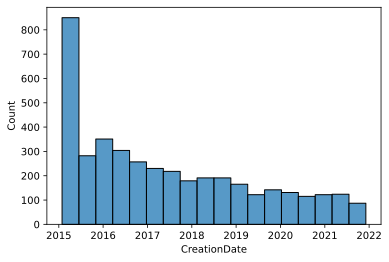

In [106]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%config InlineBackend.figure_format = 'svg'

sns.histplot(posts_df["CreationDate"])

plt.show()

In [107]:
## Let's try and do the same thing with matplotlib rather than seaborn.

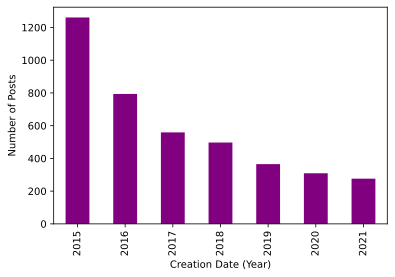

In [108]:
yeardist = posts_df["CreationDate"].dt.year

figure1 = yeardist.value_counts().sort_index().plot(kind="bar", color = "purple")
plt.xlabel('Creation Date (Year)')
plt.ylabel('Number of Posts')

plt.show()

In [109]:
## This is interesting, but we can make it better. 

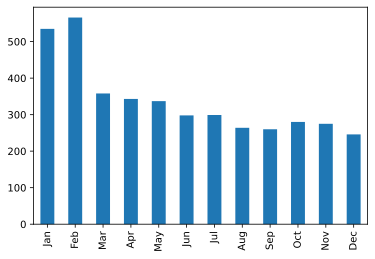

In [110]:
import calendar

month_vals = posts_df["CreationDate"].dt.month.value_counts().sort_index()
month_vals.index = [calendar.month_abbr[x] for x in month_vals.index]

month_vals.plot(kind="bar")
plt.show()

In [111]:
## Here, we have a bar chart showing us the distribution of all posts across the months of the year. Now, the early months
## are evidently skewed by our period of fervent activity in early 2015. However, although of course we should not speculate 
## about correlation or causation, we may think there could be an associaton between colder times of year, and more interest in
## coffee on the stack exchange, by the notable dip we see from May down to September, and up to October and November (although
## it does then dip back down in December - though perhaps because everyone's drinking hot chocolate!).

In [112]:
## Let's do something similar, but with resampling.

In [113]:
posts_df[["CreationDate","Score"]].resample('W',
                                            on="CreationDate").sum()

,Score
CreationDate,
2015-02-01,3119
2015-02-08,662
2015-02-15,784
2015-02-22,539
2015-03-01,319
...,...
2021-11-07,14
2021-11-14,4
2021-11-21,2


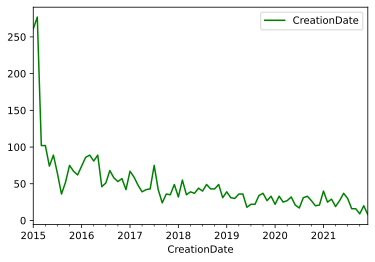

In [114]:
posts_df[["CreationDate"]].resample('M',
                                    on="CreationDate").count().plot(color = "green")

plt.show()

In [115]:
# This is comfortably the most interesting graph so far. 

In [116]:
## Those really early days in 2015 are particularly interesting, so let's try and see when the number of posts dropped off.
## We can do this by first creating a version of the dataset only for January, February and March 2015, and then looking at that. 

In [117]:
posts_mask_for_time = (posts_df["CreationDate"]>= '2014-12') & \
       (posts_df["CreationDate"]<'2015-04')

In [118]:
posts_df[posts_mask_for_time]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate,clean_Body,list_url,list_Tags,DisplayName,reply_count
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,24,2015-01-27 20:09:32.720,48,2740.0,"<p>I just got a pound of microroasted, local c...",4,2019-02-04 13:15:48.970,How should I store whole bean coffee?,...,NaN,NaT,,NaN,NaT,"I just got a pound of microroasted, local coff...",[],"[storage, whole-bean]",Kyle Macey,7.0
7,7,2,NaN,2015-01-27 20:46:43.660,18,NaN,<p>Tamping is one of three key controls you ha...,4,2016-07-12 18:50:36.753,NaN,...,5,NaT,,NaN,NaT,Tamping is one of three key controls you have ...,[https://www.wholelattelove.com/community/vide...,[],Kyle Macey,NaN
18,18,2,NaN,2015-01-27 21:07:08.867,11,NaN,"<p>In general, it's best to <em>not</em> store...",4,2015-01-27 21:12:48.687,NaN,...,12,NaT,,NaN,NaT,"In general, it's best to not store ground coff...",[],[],Kyle Macey,NaN
30,30,2,NaN,2015-01-27 21:29:26.020,5,NaN,<p>The key here is <em>extraction</em> from th...,4,2015-01-27 21:29:26.020,NaN,...,26,NaT,,NaN,NaT,The key here is extraction from the espresso c...,[],[],Kyle Macey,NaN
34,34,2,NaN,2015-01-27 21:38:40.710,15,NaN,"<p>In general, <strong>darker, arabica</strong...",4,2016-09-15 09:49:20.317,NaN,...,29,NaT,,NaN,NaT,"In general, darker, arabica roasts have less c...",[http://coffeechemistry.com/agriculture/differ...,[],Kyle Macey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1681,4,NaN,2015-03-29 14:10:27.987,0,NaN,About coffee preparations that contain no caff...,1118,2019-06-17 04:29:00.243,NaN,...,NaN,NaT,,NaN,NaT,About coffee preparations that contain no caff...,[],[],Stephie,NaN
1682,1682,2,NaN,2015-03-30 15:00:49.967,4,NaN,"<p>For French Press, my default brew time is f...",576,2015-03-30 15:06:53.127,NaN,...,297,NaT,,NaN,NaT,"For French Press, my default brew time is four...",[],[],keithjgrant,NaN
1683,1683,1,1920,2015-03-30 15:05:31.327,16,4989.0,"<p>I am a fan of pour-over, generally speaking...",576,2019-12-09 15:49:41.410,Does the bloom matter in French Press?,...,NaN,NaT,,NaN,NaT,"I am a fan of pour-over, generally speaking, a...",[],"[french-press, coffee-bloom]",keithjgrant,3.0


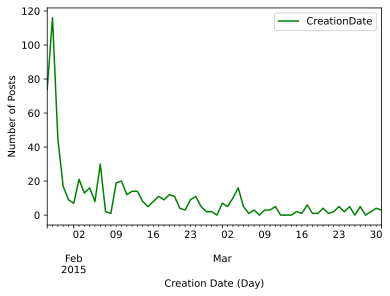

In [119]:
posts_df[posts_mask_for_time][["CreationDate"]].resample('D',
                            on="CreationDate").count().plot(color = "green")

plt.xlabel('Creation Date (Day)')
plt.ylabel('Number of Posts')

plt.show()

In [120]:
## This shows that there really were a few days of incredibly heightened activity, before the slump. 

In [121]:
## Okay, that's a good start. Now let's see if we can do the same with the users' data. 

In [122]:
## Let's check, for our users' data, whether there is much missing data. 

In [123]:
len(users_df)

9418

In [124]:
tot = len(users_df)

for col in ["CreationDate", 
            "LastAccessDate"]:
     print(f"Number of missing for {col}: ", tot-users_df[col].count())

Number of missing for CreationDate:  0
Number of missing for LastAccessDate:  0


In [125]:
## Excellent, so there is no missing data. Now we can do some datetime analysis of both of these variables, as both are
## quite interesting.

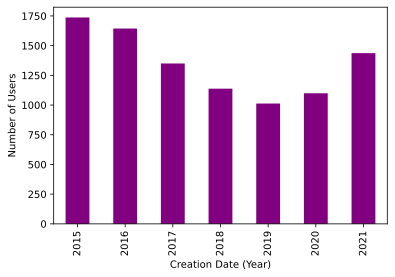

In [126]:
yeardist2 = users_df["CreationDate"].dt.year

figure1 = yeardist2.value_counts().sort_index().plot(kind="bar", color = "purple")
plt.xlabel('Creation Date (Year)')
plt.ylabel('Number of Users')

plt.show()

In [127]:
## Fascinatingly, while the number of posts never rises, the number of users creating accounts rises in 2020 and 2021 (perhaps 
## because people suddenly had some time on their hands). With this said, it would appear that these new users were not posting,
## at least as frequently as one might expect?

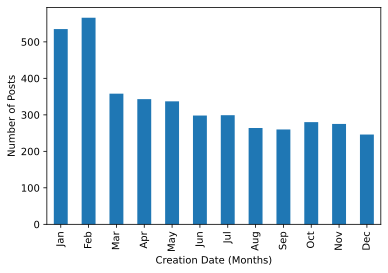

In [128]:
import calendar

month_vals2 = posts_df["CreationDate"].dt.month.value_counts().sort_index()
month_vals2.index = [calendar.month_abbr[x] for x in month_vals2.index]
plt.xlabel('Creation Date (Months)')
plt.ylabel('Number of Posts')

month_vals2.plot(kind="bar")
plt.show()

In [129]:
## Interestingly, the users creation months track nicely with the posts. I'd like to know why people don't want to talk about 
## coffee in December, and do in October. 

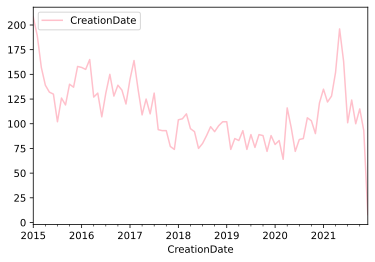

In [130]:
users_df[["CreationDate"]].resample('M',
                                    on="CreationDate").count().plot(color = "pink")

plt.show()

In [131]:
## I have no idea what was happening in 2020, or arguably, 2021. Let's have a look at both. 

In [132]:
users_mask_for_time1 = (users_df["CreationDate"]>= '2019-12') & \
       (users_df["CreationDate"]<'2021-12')

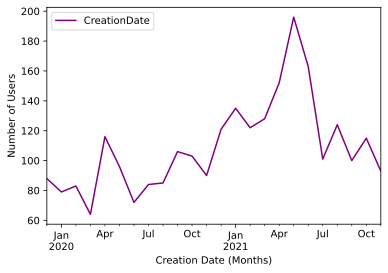

In [133]:
users_df[users_mask_for_time1][["CreationDate"]].resample('M',
                            on="CreationDate").count().plot(color = "purple")

plt.xlabel('Creation Date (Months)')
plt.ylabel('Number of Users')

plt.show()

In [134]:
## What we see from this graph, is a spike not in March 2020 (i.e. when Covid hit - althoug admittedly we went into lockdown
## towards the end of March I suppose), but in April 2020, when the Dalgona coffee
## craze hit. We can also see an enormous spike in user account creations in mid-2021 (not sure why though!).

## It's curious that these higher user numbers did not translate into higher post numbers. 

In [135]:
users_mask_for_time1 = (users_df["CreationDate"]>= '2020-12') & \
       (users_df["CreationDate"]<'2021-12')

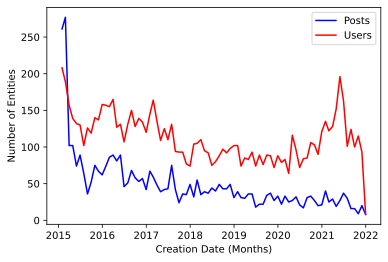

In [136]:
x_data = posts_df[["CreationDate"]].resample('M',
                                    on="CreationDate").count()

y_data = users_df[["CreationDate"]].resample('M',
                                    on="CreationDate").count()

plt.plot(x_data, color = "blue", label = "Posts")
plt.plot(y_data, color = "red", label = "Users")

plt.xlabel("Creation Date (Months)")
plt.ylabel("Number of Entities")

plt.legend(loc = 'upper right')

plt.show()

In [137]:
## Excellent. This is a good graph. With this said, I do not know why there has been such an enormous drop off in 2022 (I would
## assume that's an error in the data's operationalization or collection, rather than something that really happened).

###### And finally, the last analysis on the posts

In [138]:
## Ok, let's do some TF-IDF on the posts clean_body content. 

In [139]:
posts_for_word_analysis_df = posts_df.copy()

tfidf_posts = posts_for_word_analysis_df["clean_Body"].map(lambda x: clean_text(x))

In [140]:
vectorizer = TfidfVectorizer()

wordmat2 = vectorizer.fit_transform(tfidf_posts).todense()
wordlist2 = vectorizer.get_feature_names()

tfidf_posts_scores = wordmat2.sum(axis=0)

# tfidf_scores is a numpy matrix, but we need it as an array
# *.A1 is syntactic sugar for np.asarray(*).ravel()
top_words = pd.Series(tfidf_posts_scores.A1,
                      index=wordlist2)

# We can now sort that series to get the top most distinctive words
top_words.sort_values(ascending=False)[:30]

coffee      310.351360
water       141.757584
use         132.888876
brew        129.616956
bean        129.525991
grind       122.809226
roast       108.361777
make        100.856167
espresso     98.033581
cup          95.799430
filter       91.523406
get          86.489206
machine      85.650901
taste        85.366490
like         81.936576
caffeine     81.870078
would        79.062201
time         76.593059
milk         71.814841
drink        71.489052
one          69.276135
flavor       62.926618
ground       61.017086
try          60.813696
also         60.513850
good         58.465387
press        58.231894
find         55.088567
pot          54.574961
much         53.720784
dtype: float64

In [141]:
## Interestingly, water is very high up (the type of water you use in coffee is quite important; and of course many technique
## guides will suggest you pur the water in certain ways). It's also interesting that 'roast' scores very highly indeed. 

In [142]:
## Let's try and see whether users of this stack exchange like to use other drink-based stack exchanges; in particular, let's 
## look at the homebrew stack exchange and the beer stack exchange. The homebrew one will be particularly interesting, since home
## brewing requires the same sort of cafeful attention as expert coffee-making (and we know that the stack likes chemistry).

##### Votes

In [143]:
def parse_stack_votes(file_path):
    
    """Takes an XML export from Stack Exchange and returns it as a cleaned DataFrame. """
    
    xml_data = open(file_path / "Votes.xml" ,'r', encoding = "utf8").read()

    stack_dict = xmltodict.parse(xml_data)

    stack_df = pd.json_normalize(stack_dict["votes"]["row"])
    
    stack_df.columns = [i.replace("@","") for i in stack_df.columns]
    
    stack_df.set_index('Id', inplace=True, drop = False)
    
    for col in ["VoteTypeId","PostId","Id","UserId"]:
        stack_df[col] = pd.to_numeric(stack_df[col],errors="coerce")
    
    for col in ["CreationDate"]:
        stack_df[col] = pd.to_datetime(stack_df[col])

    return stack_df

In [144]:
file_path = data_dir

votes_df = parse_stack_votes(file_path)

In [145]:
votes_df.head()

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
Id,,,,,,
1,1,1,2,2015-01-27,NaN,NaN
2,2,1,2,2015-01-27,NaN,NaN
3,3,3,2,2015-01-27,NaN,NaN
4,4,3,2,2015-01-27,NaN,NaN
5,5,7,2,2015-01-27,NaN,NaN


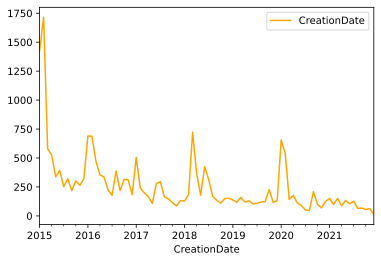

In [146]:
votes_df[["CreationDate"]].resample('M',
                                    on="CreationDate").count().plot(color = "orange")

plt.show()

In [147]:
## This is an interesting shape, but it doesn't make any sense. I might talk about this if I have room in the final draft, but
## otherwise will leave it out.

In [148]:
new_mask_here = votes_df["VoteTypeId"] == 4

temporary_df_for_vote_types = votes_df[new_mask_here].copy()

num_posts_x = len(temporary_df_for_vote_types)

print(num_posts_x)

2


In [149]:
## 2 posts were voted to be offensive, in the entire history of the stack exchange. Coffee is evidently a nice place!

##### Post History

In [150]:
## Now, we also make a function to parse PostHistory, to find out how many of these posts were tweeted (interesting) - tells
## us about the conversational practices. 

In [151]:
def parse_stack_post_history(file_path):
    
    """Takes an XML export from Stack Exchange and returns it as a cleaned DataFrame. """
    
    xml_data = open(file_path / "PostHistory.xml" ,'r', encoding = "utf8").read()

    stack_dict = xmltodict.parse(xml_data)

    stack_df = pd.json_normalize(stack_dict["posthistory"]["row"])
    
    stack_df.columns = [i.replace("@","") for i in stack_df.columns]
    
    stack_df.set_index('Id', inplace=True, drop = False)
    
    for col in ["PostHistoryTypeId",
               "PostId",
               "UserId",
               "Id"]:
        stack_df[col] = pd.to_numeric(stack_df[col],errors="coerce")
    
    for col in ["CreationDate"]:
        stack_df[col] = pd.to_datetime(stack_df[col])

    return stack_df

In [152]:
file_path = data_dir

post_history_df = parse_stack_post_history(file_path)

In [153]:
post_history_df.head()

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense,Comment,UserDisplayName
Id,,,,,,,,,,
1,1,2,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27 20:09:32.720,4.0,"I just got a pound of microroasted, local coff...",CC BY-SA 3.0,NaN,NaN
2,2,1,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27 20:09:32.720,4.0,How should I store whole bean coffee?,CC BY-SA 3.0,NaN,NaN
3,3,3,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27 20:09:32.720,4.0,<storage><whole-bean>,CC BY-SA 3.0,NaN,NaN
4,4,2,2,eee3664d-2c4f-432c-bce9-3fdfaf59fe94,2015-01-27 20:13:58.610,8.0,I manually grind coffee beans for drip coffee ...,CC BY-SA 3.0,NaN,NaN
5,5,1,2,eee3664d-2c4f-432c-bce9-3fdfaf59fe94,2015-01-27 20:13:58.610,8.0,How fine should I grind coffee for drip coffee,CC BY-SA 3.0,NaN,NaN


In [154]:
new_masker = post_history_df["PostHistoryTypeId"] == 25

temporary_df_for_post_history_types = post_history_df[new_masker].copy()

num_posts_x = len(temporary_df_for_post_history_types)

print(num_posts_x)

0


In [155]:
## So, no posts were ever Tweeted. This may say less about this particular stack exchange, than the stack exchange as a whole,
## of course. 

In [156]:
new_masker = post_history_df["PostHistoryTypeId"] == 5

temporary_df_for_post_history_types = post_history_df[new_masker].copy()

num_posts_x = len(temporary_df_for_post_history_types)

print(num_posts_x)

2062


In [157]:
temporary_df_for_post_history_types.sample()

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense,Comment,UserDisplayName
Id,,,,,,,,,,
9960,9960,5,2285,0f41fce4-afc6-446b-a616-b6db2d1d0c89,2018-06-25 18:06:33.933,-1.0,"I've been thinking about this for a while, and...",CC BY-SA 4.0,corrected spelling/grammar,NaN


In [158]:
## So, interesingly, it appears that 2062 posts were edited! That's incredibly intersting if it's true, which it appears to 
## be, judging by the table (for instance, in 'Comment' it says what each edit is - for instance "added 25 characters in body").

## We can also tell that this is the case, and there are no double-edited posts by running an is_unique on the Id column. 

In [159]:
temporary_df_for_post_history_types["Id"].is_unique

True